In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./processed_train_data.csv')
print(df.columns)

Index(['datetime', 'energy'], dtype='object')


In [3]:
datatime = df['datetime']
energy = df['energy']

In [4]:
split_ratio = 0.8
train_energy = energy[:int(split_ratio*len(energy))]
test_energy = energy[int(split_ratio*len(energy)):]

In [5]:
print(train_energy.isnull().sum())  # Count NaN values
print(np.isinf(train_energy).sum())  # Count infinite values
train_energy = train_energy.dropna()
print(train_energy.isnull().sum())  # Count NaN values
print(np.isinf(train_energy).sum())  # Count infinite values

print(test_energy.isnull().sum())  # Count NaN values
print(np.isinf(test_energy).sum())  # Count infinite values
test_energy = test_energy.dropna()
print(test_energy.isnull().sum())  # Count NaN values
print(np.isinf(test_energy).sum())  # Count infinite values

1503
0
0
0
397
0
0
0


In [6]:
print(type(train_energy))

<class 'pandas.core.series.Series'>


In [7]:
print(train_energy.shape)
print(test_energy.shape)

(74490,)
(18602,)


In [8]:
# predict the test data using the train data ewma and optimal_alpha
optimal_alpha = 0.1
train_energy_ewma = train_energy.ewm(alpha=optimal_alpha).mean()
test_energy_ewma = test_energy.copy()
test_energy_ewma.iloc[0] = optimal_alpha * train_energy_ewma.iloc[-1] + (1 - optimal_alpha) * train_energy.iloc[-1]
for i in range(1, len(test_energy)):
    test_energy_ewma.iloc[i] = optimal_alpha * test_energy_ewma.iloc[i-1] + (1 - optimal_alpha) * test_energy.iloc[i-1]


In [9]:
# now calculate Mean ,Standard Deviation, RSE and RMSE for the test data vs test data ewma
mean = test_energy.mean()
std = test_energy.std()
rse = np.sqrt(((test_energy - test_energy_ewma) ** 2).sum() / ((test_energy - mean) ** 2).sum())
rmse = np.sqrt(((test_energy - test_energy_ewma) ** 2).mean())
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"RSE: {rse}")
print(f"RMSE: {rmse}")

Mean: 2001.9523784187631
Standard Deviation: 349.9815938662986
RSE: 0.22787266419085092
RMSE: 79.74909456327127


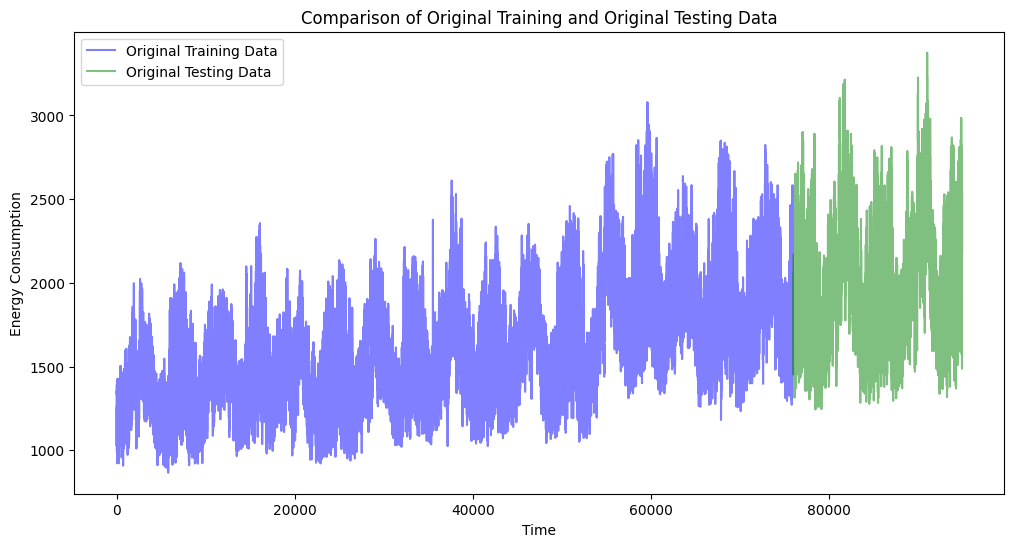

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train_energy, label='Original Training Data', color='blue', alpha=0.5)
# plt.plot(train_energy_ewma, label='EWMA Training Data', color='orange')

# Add testing data to the same plot
plt.plot(test_energy, label='Original Testing Data', color='green', alpha=0.5)
# plt.plot(test_energy_ewma, label='EWMA Testing Data', color='red')
plt.title('Comparison of Original Training and Original Testing Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

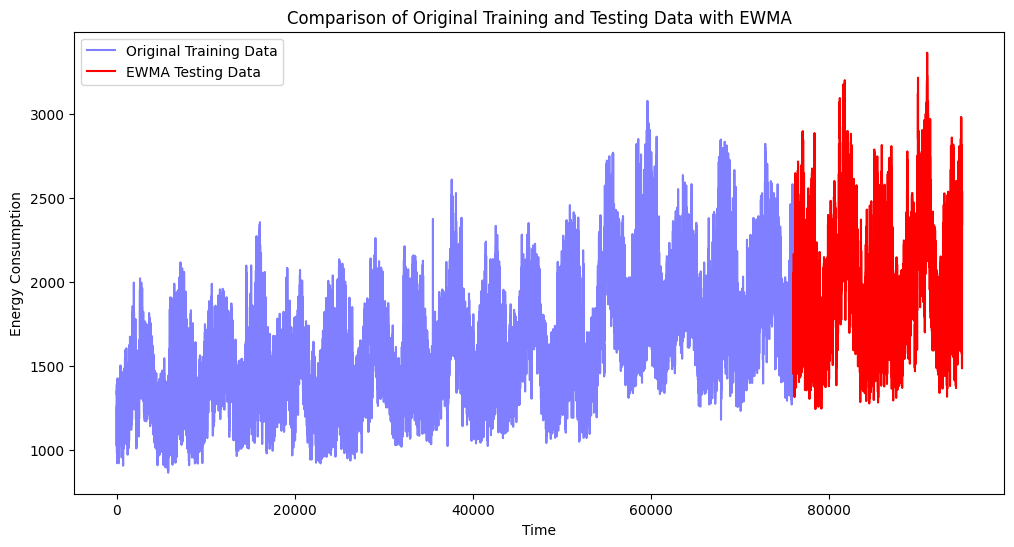

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(train_energy, label='Original Training Data', color='blue', alpha=0.5)
# plt.plot(train_energy_ewma, label='EWMA Training Data', color='orange')

# Add testing data to the same plot
# plt.plot(test_energy, label='Original Testing Data', color='green', alpha=0.5)
plt.plot(test_energy_ewma, label='EWMA Testing Data', color='red')
plt.title('Comparison of Original Training and Testing Data with EWMA')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

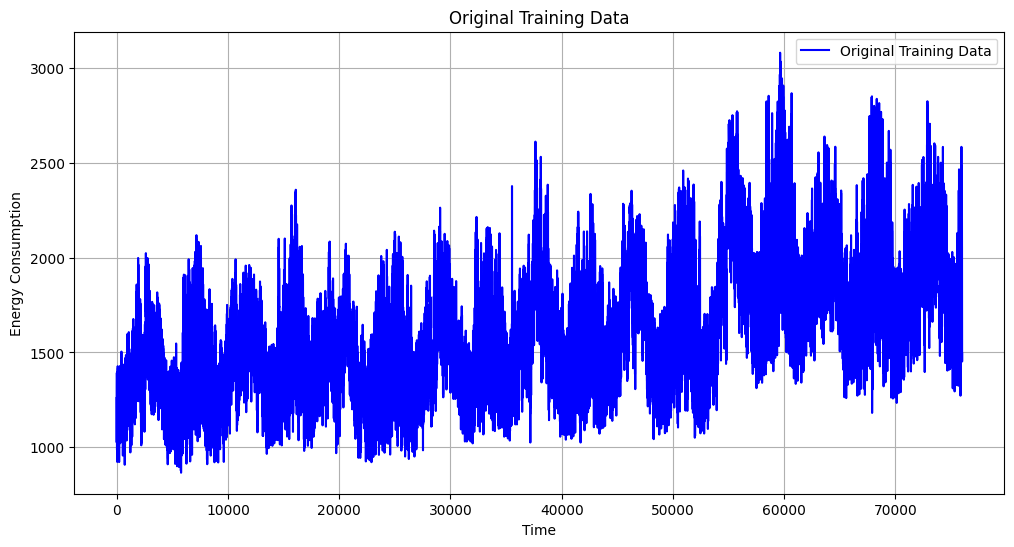

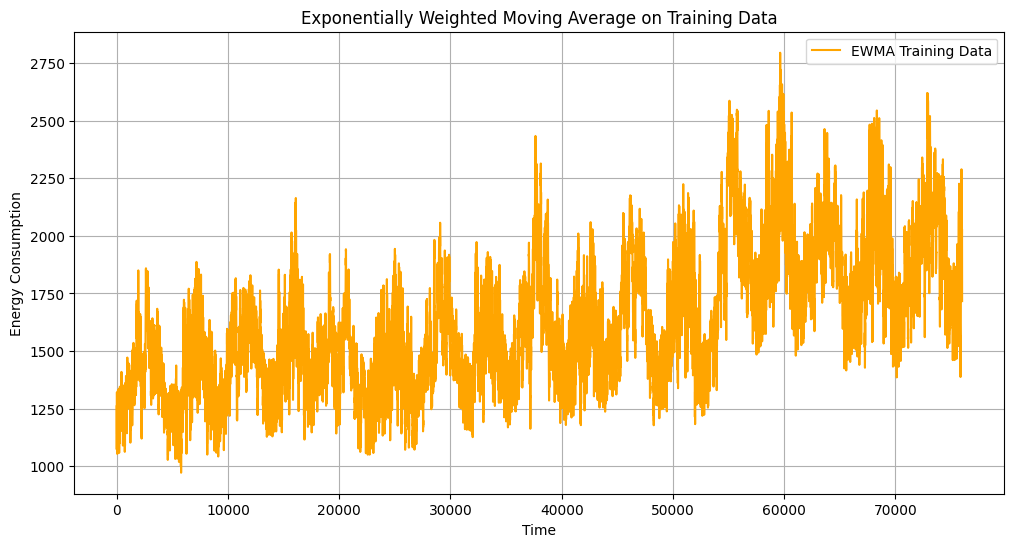

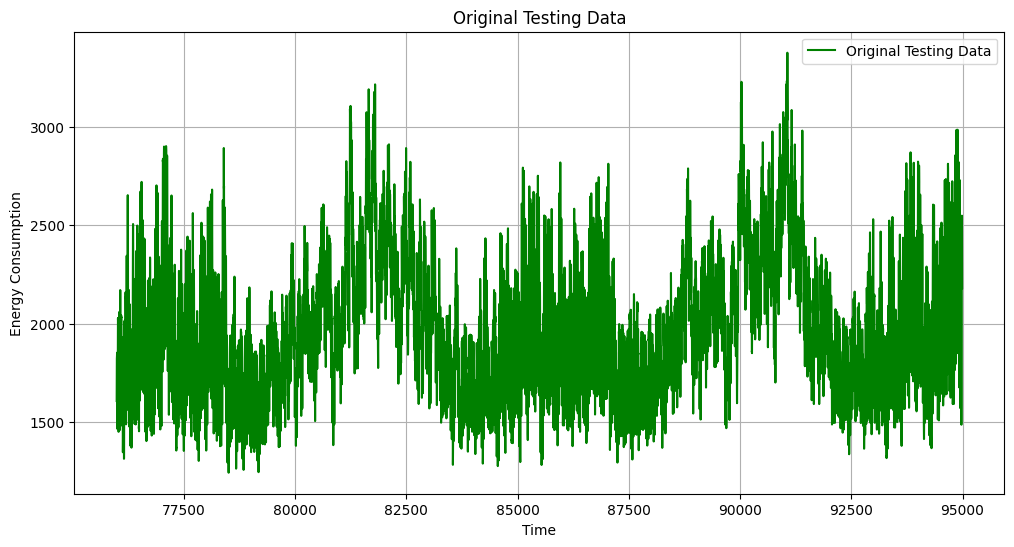

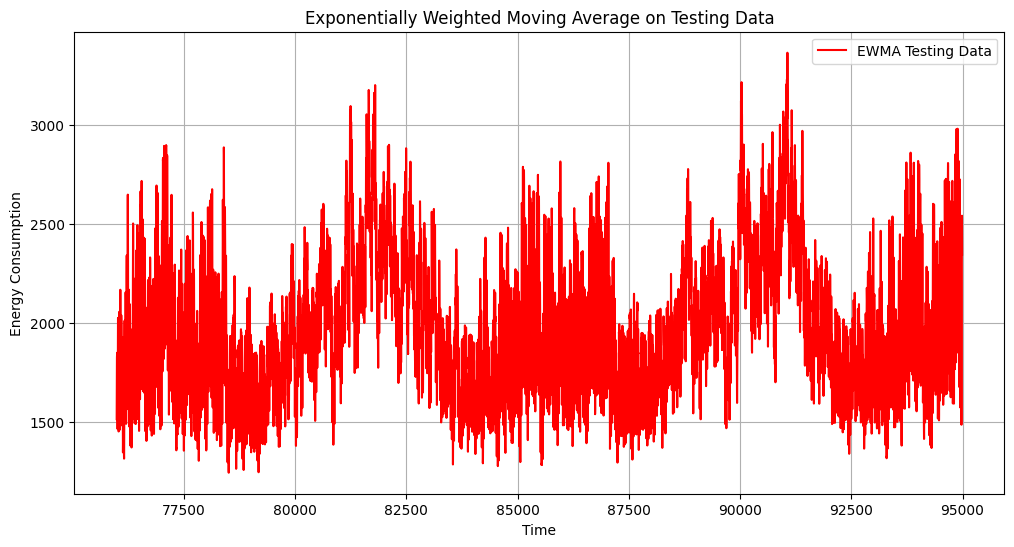

In [12]:
# Graph 1: Original Training Data
plt.figure(figsize=(12, 6))
plt.plot(train_energy, label='Original Training Data', color='blue')
plt.title('Original Training Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid()
plt.show()

# Graph 2: EWMA for Training Data
plt.figure(figsize=(12, 6))
plt.plot(train_energy_ewma, label='EWMA Training Data', color='orange')
plt.title('Exponentially Weighted Moving Average on Training Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid()
plt.show()

# Graph 3: Original Testing Data
plt.figure(figsize=(12, 6))
plt.plot(test_energy, label='Original Testing Data', color='green')
plt.title('Original Testing Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid()
plt.show()

# Graph 4: EWMA for Testing Data
plt.figure(figsize=(12, 6))
plt.plot(test_energy_ewma, label='EWMA Testing Data', color='red')
plt.title('Exponentially Weighted Moving Average on Testing Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid()
plt.show()